Fetch Historical Data from Open-Meteo

In [1]:
import pandas as pd
df_weather = pd.read_json(r"C:\Users\Linds\Repos\East_River\data\Processed\time_processed_weather.json")
df_weather.head()

location                  datetime  temperature  wind_speed  \
0  Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0         7.0   
1  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0         7.0   
2  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0         7.0   
3  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0         7.0   
4  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0         7.0   

   wind_degree  precip  humidity  visibility  pressure  cloudcover  heatindex  \
0        197.0     0.0      90.0         6.0    30.120        69.0       12.0   
1        196.0     0.0      90.0         6.0    30.105        61.0       11.0   
2        195.0     0.0      90.0         6.0    30.090        53.0       10.0   
3        194.0     0.0      89.5         6.0    30.090        45.5       10.0   
4        193.0     0.0      89.0         6.0    30.090        38.0       10.0   

   dewpoint  windchill  windgust  feelslike  uv_index  \
0       9.0        0.0      15.0        0.0       1.0   
1       9.0        0.0      15.5        0.0       1.0   
2       9.0        0.0      16.0        0.0       1.0   
3       9.0        0.0      16.0        0.0       1.0   
4       9.0        0.0      16.0        0.0       1.0   

                obs_tms_lcl wind_dir weather_descriptions  
0  2020-12-31T06:00:00.000Z      SSW               Cloudy  
1  2020-12-31T06:00:00.000Z      SSW               Cloudy  
2  2020-12-31T07:00:00.000Z      SSW        Partly cloudy  
3  2020-12-31T07:00:00.000Z      SSW        Partly cloudy  
4  2020-12-31T08:00:00.000Z      SSW        Partly cloudy

In [2]:
start_datetime = df_weather["datetime"].min()
end_datetime = df_weather["datetime"].max()
print("Start date:", start_datetime)
print("End date:", end_datetime)

Start date: 2020-12-31 06:00:00+00:00
End date: 2024-12-27 05:00:00+00:00


Fetch historical data from Open-Meteo

In [3]:
import requests

def fetch_open_meteo_historical(lat, lon, start_date, end_date, hourly_vars=None):
    # Default hourly variables if not specified
    if hourly_vars is None:
        hourly_vars = ["temperature_2m", "precipitation", "snowfall", "snow_depth", "apparent_temperature", "relative_humidity_2m", "precipitation_probability", "freezing_level_height", "evapotranspiration", "global_tilted_irradiance", "diffuse_radiation", "direct_radiation", "pressure_msl", "surface_pressure"]
    # Open-Meteo historical endpoint URL
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,  # e.g., "2020-12-31"
        "end_date": end_date,      # e.g., "2024-12-27"
        "hourly": ",".join(hourly_vars),
        "timezone": "auto"  # Adjust as needed
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()

# Example usage:
lat = 44.0       # Example latitude
lon = -100.0     # Example longitude
start_date = "2020-12-31"
end_date = "2024-12-27"

data = fetch_open_meteo_historical(lat, lon, start_date, end_date)
print(data)


{'latitude': 43.971878, 'longitude': -99.969666, 'generationtime_ms': 479.95054721832275, 'utc_offset_seconds': -18000, 'timezone': 'America/Chicago', 'timezone_abbreviation': 'GMT-5', 'elevation': 563.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'precipitation': 'mm', 'snowfall': 'cm', 'snow_depth': 'm', 'apparent_temperature': '°C', 'relative_humidity_2m': '%', 'precipitation_probability': 'undefined', 'freezing_level_height': 'undefined', 'evapotranspiration': 'undefined', 'global_tilted_irradiance': 'W/m²', 'diffuse_radiation': 'W/m²', 'direct_radiation': 'W/m²', 'pressure_msl': 'hPa', 'surface_pressure': 'hPa'}, 'hourly': {'time': ['2020-12-31T00:00', '2020-12-31T01:00', '2020-12-31T02:00', '2020-12-31T03:00', '2020-12-31T04:00', '2020-12-31T05:00', '2020-12-31T06:00', '2020-12-31T07:00', '2020-12-31T08:00', '2020-12-31T09:00', '2020-12-31T10:00', '2020-12-31T11:00', '2020-12-31T12:00', '2020-12-31T13:00', '2020-12-31T14:00', '2020-12-31T15:00', '2020-12-31T16:00

# Process the json reponse into the dataframe 

In [4]:
import pandas as pd

def process_open_meteo_data(json_data):
    # Extract the "hourly" dictionary
    hourly_data = json_data.get("hourly", {})
    if not hourly_data:
        print("No hourly data found!")
        return pd.DataFrame()
    # Create a DataFrame from the hourly data dictionary
    df_hourly = pd.DataFrame(hourly_data)
    # Convert the time column to datetime objects
    if "time" in df_hourly.columns:
        df_hourly["datetime"] = pd.to_datetime(df_hourly["time"])
        df_hourly.drop(columns=["time"], inplace=True)
    else:
        print("No 'time' column found in data!")
    return df_hourly

# Process the retrieved data
df_open_meteo = process_open_meteo_data(data)
print(df_open_meteo.head())


   temperature_2m  precipitation  snowfall  snow_depth  apparent_temperature  \
0            -7.9            0.0       0.0        0.09                 -12.9   
1            -8.2            0.0       0.0        0.09                 -13.0   
2            -8.9            0.0       0.0        0.09                 -13.7   
3           -10.3            0.0       0.0        0.09                 -15.6   
4           -10.7            0.0       0.0        0.09                 -16.2   

   relative_humidity_2m precipitation_probability freezing_level_height  \
0                    73                      None                  None   
1                    74                      None                  None   
2                    75                      None                  None   
3                    77                      None                  None   
4                    76                      None                  None   

  evapotranspiration  global_tilted_irradiance  diffuse_radiation  \

In [5]:
# Ensure the datetime column is set as the index
df_open_meteo.set_index("datetime", inplace=True)
# Resample to 30-minute intervals using time interpolation
df_open_meteo_30min = df_open_meteo.resample("30T").interpolate(method='time').reset_index()
print(df_open_meteo_30min.head())


             datetime  temperature_2m  precipitation  snowfall  snow_depth  \
0 2020-12-31 00:00:00           -7.90            0.0       0.0        0.09   
1 2020-12-31 00:30:00           -8.05            0.0       0.0        0.09   
2 2020-12-31 01:00:00           -8.20            0.0       0.0        0.09   
3 2020-12-31 01:30:00           -8.55            0.0       0.0        0.09   
4 2020-12-31 02:00:00           -8.90            0.0       0.0        0.09   

   apparent_temperature  relative_humidity_2m precipitation_probability  \
0                -12.90                  73.0                      None   
1                -12.95                  73.5                       NaN   
2                -13.00                  74.0                      None   
3                -13.35                  74.5                       NaN   
4                -13.70                  75.0                      None   

  freezing_level_height evapotranspiration  global_tilted_irradiance  \
0       

C:\Users\Linds\AppData\Local\Temp\ipykernel_53940\849068899.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_open_meteo_30min = df_open_meteo.resample("30T").interpolate(method='time').reset_index()


In [7]:

df_main = df_weather.copy()
df_main['datetime'] = pd.to_datetime(df_main['datetime'])
# Ensure that the datetime column in df_open_meteo_30min is timezone-aware (UTC) for a successful merge
df_open_meteo_30min['datetime'] = pd.to_datetime(df_open_meteo_30min['datetime'], utc=True)
df_merged = pd.merge(df_main, df_open_meteo_30min, on="datetime", how="left")
print(df_merged.head())


                 location                  datetime  temperature  wind_speed  \
0  Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0         7.0   
1  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0         7.0   
2  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0         7.0   
3  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0         7.0   
4  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0         7.0   

   wind_degree  precip  humidity  visibility  pressure  cloudcover  ...  \
0        197.0     0.0      90.0         6.0    30.120        69.0  ...   
1        196.0     0.0      90.0         6.0    30.105        61.0  ...   
2        195.0     0.0      90.0         6.0    30.090        53.0  ...   
3        194.0     0.0      89.5         6.0    30.090        45.5  ...   
4        193.0     0.0      89.0         6.0    30.090        38.0  ...   

   apparent_temperature  relative_humidity_2m  precipitation_probabi

In [8]:
import pandas as pd

# Function to summarize missing values
def missing_summary(df):
    total = len(df)
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / total) * 100
    summary = pd.DataFrame({
        'missing_count': missing_counts,
        'missing_percent': missing_percent
    })
    return summary

# Function to summarize zeros for numeric columns
def zero_summary(df):
    # Only consider numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    total = len(df)
    zero_counts = (df[numeric_cols] == 0).sum()
    zero_percent = (zero_counts / total) * 100
    summary = pd.DataFrame({
        'zero_count': zero_counts,
        'zero_percent': zero_percent
    })
    return summary

# Assume your merged DataFrame is called df_merged
missing_stats = missing_summary(df_merged)
print("Missing Data Summary:")
print(missing_stats)

zero_stats = zero_summary(df_merged)
print("\nZero Value Summary (for numeric columns):")
print(zero_stats)


Missing Data Summary:
                           missing_count  missing_percent
location                               0              0.0
datetime                               0              0.0
temperature                            0              0.0
wind_speed                             0              0.0
wind_degree                            0              0.0
precip                                 0              0.0
humidity                               0              0.0
visibility                             0              0.0
pressure                               0              0.0
cloudcover                             0              0.0
heatindex                              0              0.0
dewpoint                               0              0.0
windchill                              0              0.0
windgust                               0              0.0
feelslike                              0              0.0
uv_index                               0          

In [9]:
print(df_merged.describe())


        temperature    wind_speed   wind_degree        precip      humidity  \
count  1.216869e+07  1.216869e+07  1.216869e+07  1.216869e+07  1.216869e+07   
mean   4.814735e+01  1.010118e+01  1.948545e+02  2.390800e-03  6.806421e+01   
std    2.374325e+01  4.881041e+00  9.753382e+01  1.973370e-02  2.195978e+01   
min   -3.100000e+01  0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00   
25%    3.000000e+01  6.500000e+00  1.270000e+02  0.000000e+00  5.100000e+01   
50%    4.900000e+01  9.000000e+00  1.805000e+02  0.000000e+00  7.100000e+01   
75%    6.700000e+01  1.300000e+01  2.910000e+02  0.000000e+00  8.800000e+01   
max    1.130000e+02  3.700000e+01  3.600000e+02  1.800000e+00  1.000000e+02   

         visibility      pressure    cloudcover     heatindex      dewpoint  \
count  1.216869e+07  1.216869e+07  1.216869e+07  1.216869e+07  1.216869e+07   
mean   5.488631e+00  2.998164e+01  4.282932e+01  4.856749e+01  3.606081e+01   
std    1.424737e+00  2.581221e-01  3.716549e+01  2.

In [10]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12168690 entries, 0 to 12168689
Data columns (total 33 columns):
 #   Column                     Dtype              
---  ------                     -----              
 0   location                   object             
 1   datetime                   datetime64[ns, UTC]
 2   temperature                float64            
 3   wind_speed                 float64            
 4   wind_degree                float64            
 5   precip                     float64            
 6   humidity                   float64            
 7   visibility                 float64            
 8   pressure                   float64            
 9   cloudcover                 float64            
 10  heatindex                  float64            
 11  dewpoint                   float64            
 12  windchill                  float64            
 13  windgust                   float64            
 14  feelslike                  float64            
 

In [11]:
def missing_summary(df):
    total = len(df)
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / total) * 100
    summary = pd.DataFrame({
        'missing_count': missing_counts,
        'missing_percent': missing_percent
    })
    return summary

print(missing_summary(df_merged))


                           missing_count  missing_percent
location                               0              0.0
datetime                               0              0.0
temperature                            0              0.0
wind_speed                             0              0.0
wind_degree                            0              0.0
precip                                 0              0.0
humidity                               0              0.0
visibility                             0              0.0
pressure                               0              0.0
cloudcover                             0              0.0
heatindex                              0              0.0
dewpoint                               0              0.0
windchill                              0              0.0
windgust                               0              0.0
feelslike                              0              0.0
uv_index                               0              0.0
obs_tms_lcl   

Data shape: (12168690, 33)
                 location                  datetime  temperature  wind_speed  \
0  Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0         7.0   
1  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0         7.0   
2  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0         7.0   
3  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0         7.0   
4  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0         7.0   

   wind_degree  precip  humidity  visibility  pressure  cloudcover  ...  \
0        197.0     0.0      90.0         6.0    30.120        69.0  ...   
1        196.0     0.0      90.0         6.0    30.105        61.0  ...   
2        195.0     0.0      90.0         6.0    30.090        53.0  ...   
3        194.0     0.0      89.5         6.0    30.090        45.5  ...   
4        193.0     0.0      89.0         6.0    30.090        38.0  ...   

   apparent_temperature  relative_humidit

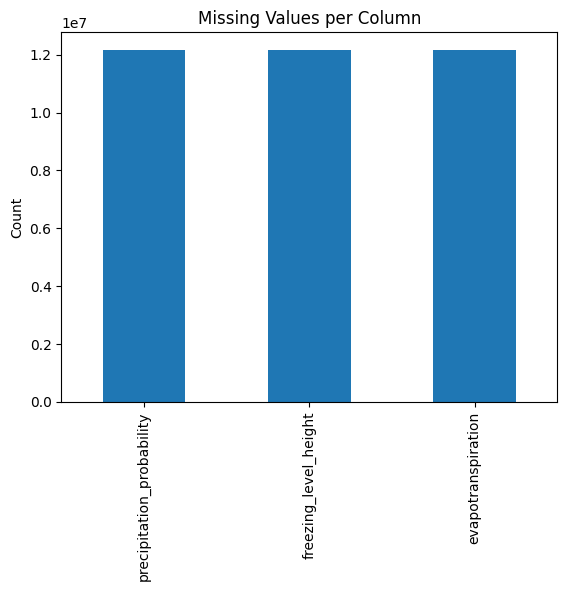

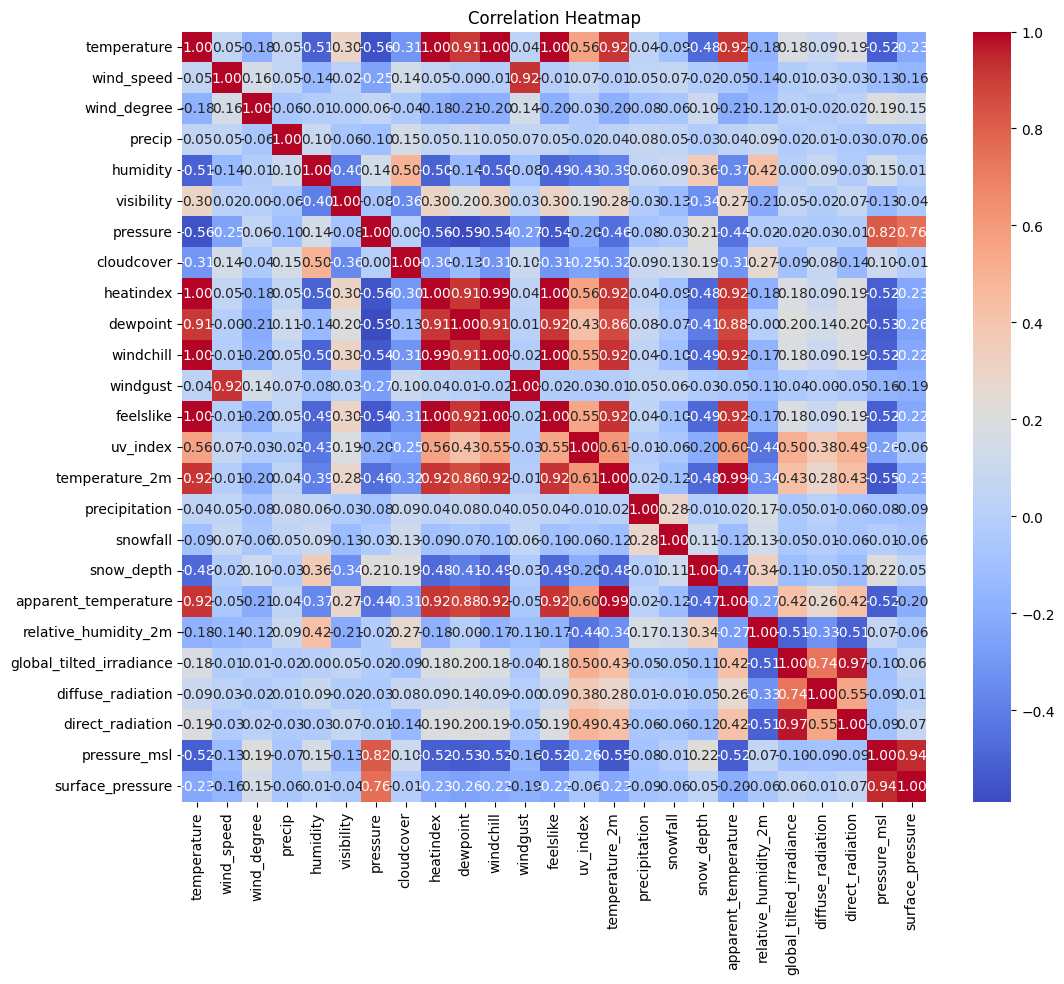

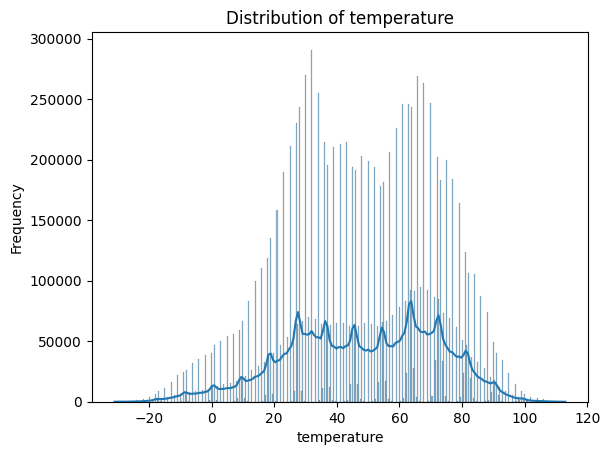

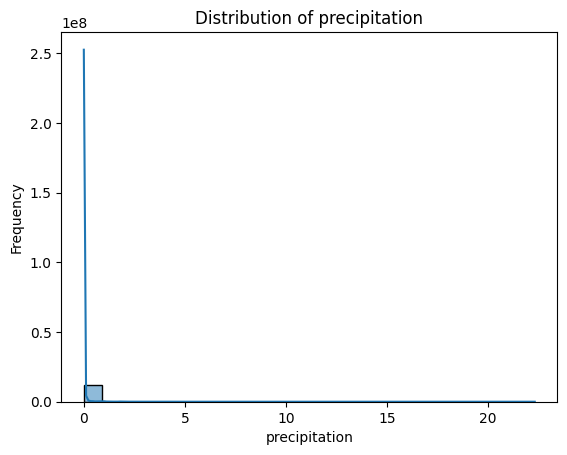

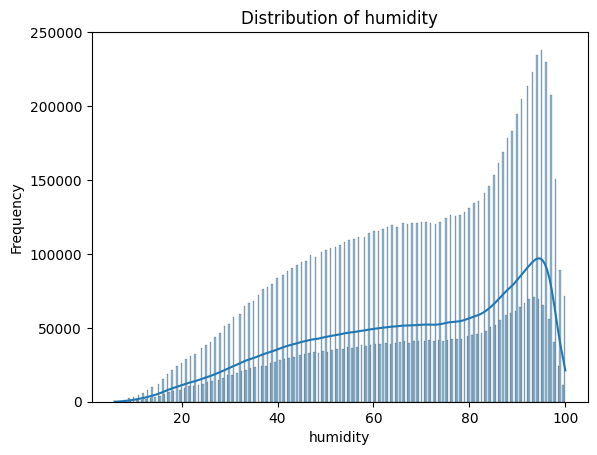

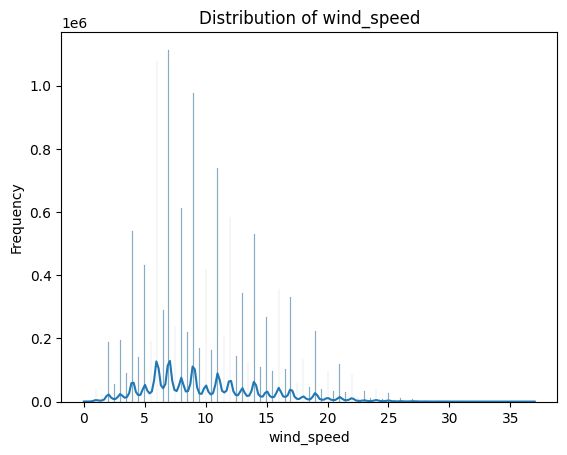

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick summary stats and shape
print("Data shape:", df_merged.shape)
print(df_merged.head())

# Plot missing values per column
missing = df_merged.isnull().sum()
missing = missing[missing > 0]
missing.plot(kind="bar", title="Missing Values per Column")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numeric columns
numeric_cols = df_merged.select_dtypes(include=["number"]).columns
corr = df_merged[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots for selected key metrics
key_columns = ['temperature', 'precipitation', 'humidity', 'wind_speed']
for col in key_columns:
    plt.figure()
    sns.histplot(df_merged[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

The EDA shows that while many weather measures (like temperature, humidity, etc.) are well‐populated, there are several columns (for example, precipitation_probability, freezing_level_height, and evapotranspiration) that are completely missing. It also indicates that some variables (like precipitation and snowfall) have very high zero counts—which might be expected for rare events or may suggest the need for special handling. Overall, the summaries and plots provide an overview of data completeness, value distributions, and potential areas for data cleaning or further analysis.

Strong Clusters of Temperature-Related Variables

Variables like temperature_2m, apparent_temperature, feelslike, heatindex, dewpoint, and windchill are all highly correlated. They’re essentially different ways of measuring or perceiving temperature, so it makes sense that they move in sync.
Precipitation & Snowfall Grouping

precipitation, snowfall, and precipitation_probability show moderate to strong positive correlations with each other and tend to be negatively correlated with some temperature-related variables. This suggests that cooler/wetter conditions often coincide.
Humidity vs. Relative Humidity

humidity (from  original dataset) and relative_humidity_2m (from Open-Meteo) appear strongly correlated, as they’re effectively measuring similar moisture content in the air.
Solar Radiation Variables

global_tilted_irradiance, diffuse_radiation, and direct_radiation tend to be positively correlated with temperature-related variables and negatively correlated with cloud-related or precipitation variables. This makes sense—sunny, warmer conditions usually coincide with higher irradiance.
Pressure Variables

pressure_msl and surface_pressure correlate strongly with each other. They also show moderate negative correlations with precipitation and humidity, indicating that lower pressure systems often bring more moisture and precipitation.
Weaker or Mixed Correlations

Some variables, such as wind_speed or wind_degree, may show weaker or mixed correlations across the board, reflecting that wind can vary independently of other conditions.
Redundancies & Feature Engineering

Certain pairs or groups of variables (like temperature measures) are nearly duplicates from a modeling standpoint. Consider whether we need all of them or if some can be dropped or combined to reduce multicollinearity.

Based on the EDA, the features that have no meaningful data (i.e. 100% missing) add no value. In this case, the columns for precipitation_probability, freezing_level_height, and evapotranspiration can be dropped. Additionally, highly redundant variables (like multiple versions of temperature that are almost perfectly correlated) may not improve performance and could be removed or combined.

In [14]:
# Drop columns with 100% missing values from df_merged
columns_to_drop = ['precipitation_probability', 'freezing_level_height', 'evapotranspiration']
df_merged.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns:", columns_to_drop)
print(df_merged.head())

Dropped columns: ['precipitation_probability', 'freezing_level_height', 'evapotranspiration']
                 location                  datetime  temperature  wind_speed  \
0  Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0         7.0   
1  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0         7.0   
2  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0         7.0   
3  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0         7.0   
4  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0         7.0   

   wind_degree  precip  humidity  visibility  pressure  cloudcover  ...  \
0        197.0     0.0      90.0         6.0    30.120        69.0  ...   
1        196.0     0.0      90.0         6.0    30.105        61.0  ...   
2        195.0     0.0      90.0         6.0    30.090        53.0  ...   
3        194.0     0.0      89.5         6.0    30.090        45.5  ...   
4        193.0     0.0      89.0         6.0    30

In [15]:
# Calculate the zero rates for the two existing columns
zero_rate_precip = (df_merged['precip'] == 0).mean() * 100
zero_rate_precipitation = (df_merged['precipitation'] == 0).mean() * 100

# Blend them by summing; the blended value is 0 only if both are 0.
df_merged['blended_precip'] = df_merged['precip'] + df_merged['precipitation']
zero_rate_blended = (df_merged['blended_precip'] == 0).mean() * 100

print("Zero rate for 'precip': {:.2f}%".format(zero_rate_precip))
print("Zero rate for 'precipitation': {:.2f}%".format(zero_rate_precipitation))
print("Zero rate for 'blended_precip': {:.2f}%".format(zero_rate_blended))

Zero rate for 'precip': 97.76%
Zero rate for 'precipitation': 91.10%
Zero rate for 'blended_precip': 89.67%


In [16]:
temp_features = ['temperature', 'heatindex', 'temperature_2m', 'apparent_temperature', 'windchill', 'feelslike', 'dewpoint']
temp_zero_summary = (df_merged[temp_features] == 0).sum().to_frame('zero_count')
temp_zero_summary['zero_percent'] = (df_merged[temp_features] == 0).mean() * 100
print("Zero summary for temperature based features:")
print(temp_zero_summary)


Zero summary for temperature based features:
                      zero_count  zero_percent
temperature                40220      0.330520
heatindex                  40227      0.330578
temperature_2m             31494      0.258812
apparent_temperature       23142      0.190177
windchill                  64114      0.526877
feelslike                  64114      0.526877
dewpoint                   75242      0.618325


Among the temperature-related features, dewpoint stands out with the highest zero rate (approximately 0.62%), which is unusually high for South Dakota’s climate.

In [17]:
if 'dewpoint' in df_merged.columns:
    df_merged.drop(columns=['dewpoint'], inplace=True)
    print("Dropped 'dewpoint' column from df_merged.")
else:
    print("'dewpoint' column not found in df_merged.")

Dropped 'dewpoint' column from df_merged.


In [18]:
df_merged.to_csv("df_merged.csv", index=False)
print("DataFrame saved as df_merged.csv")

DataFrame saved as df_merged.csv


In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

display(df_merged.head(500))

location                  datetime  temperature  \
0    Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0   
1    Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0   
2    Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0   
3    Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0   
4    Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0   
5    Aberdeen, South Dakota 2020-12-31 08:30:00+00:00         10.0   
6    Aberdeen, South Dakota 2020-12-31 09:00:00+00:00         10.0   
7    Aberdeen, South Dakota 2020-12-31 09:30:00+00:00         10.0   
8    Aberdeen, South Dakota 2020-12-31 10:00:00+00:00         10.0   
9    Aberdeen, South Dakota 2020-12-31 10:30:00+00:00         10.0   
10   Aberdeen, South Dakota 2020-12-31 11:00:00+00:00         10.0   
11   Aberdeen, South Dakota 2020-12-31 11:30:00+00:00         10.0   
12   Aberdeen, South Dakota 2020-12-31 12:00:00+00:00         10.0   
13   Aberdeen, South Dakota 2020-12-31 12:30:00+00:00         10.0   
14   Aberdeen, South Dakota 2020-12-31 13:00:00+00:00         10.0   
15   Aberdeen, South Dakota 2020-12-31 13:30:00+00:00         10.0   
16   Aberdeen, South Dakota 2020-12-31 14:00:00+00:00         10.0   
17   Aberdeen, South Dakota 2020-12-31 14:30:00+00:00         11.0   
18   Aberdeen, South Dakota 2020-12-31 15:00:00+00:00         12.0   
19   Aberdeen, South Dakota 2020-12-31 15:30:00+00:00         13.0   
20   Aberdeen, South Dakota 2020-12-31 16:00:00+00:00         14.0   
21   Aberdeen, South Dakota 2020-12-31 16:30:00+00:00         15.0   
22   Aberdeen, South Dakota 2020-12-31 17:00:00+00:00         16.0   
23   Aberdeen, South Dakota 2020-12-31 17:30:00+00:00         17.0   
24   Aberdeen, South Dakota 2020-12-31 18:00:00+00:00         18.0   
25   Aberdeen, South Dakota 2020-12-31 18:30:00+00:00         18.5   
26   Aberdeen, South Dakota 2020-12-31 19:00:00+00:00         19.0   
27   Aberdeen, South Dakota 2020-12-31 19:30:00+00:00         20.0   
28   Aberdeen, South Dakota 2020-12-31 20:00:00+00:00         21.0   
29   Aberdeen, South Dakota 2020-12-31 20:30:00+00:00         21.0   
30   Aberdeen, South Dakota 2020-12-31 21:00:00+00:00         21.0   
31   Aberdeen, South Dakota 2020-12-31 21:30:00+00:00         21.0   
32   Aberdeen, South Dakota 2020-12-31 22:00:00+00:00         21.0   
33   Aberdeen, South Dakota 2020-12-31 22:30:00+00:00         20.0   
34   Aberdeen, South Dakota 2020-12-31 23:00:00+00:00         19.0   
35   Aberdeen, South Dakota 2020-12-31 23:30:00+00:00         19.0   
36   Aberdeen, South Dakota 2021-01-01 00:00:00+00:00         19.0   
37   Aberdeen, South Dakota 2021-01-01 00:30:00+00:00         18.5   
38   Aberdeen, South Dakota 2021-01-01 01:00:00+00:00         18.0   
39   Aberdeen, South Dakota 2021-01-01 01:30:00+00:00         18.0   
40   Aberdeen, South Dakota 2021-01-01 02:00:00+00:00         18.0   
41   Aberdeen, South Dakota 2021-01-01 02:30:00+00:00         17.0   
42   Aberdeen, South Dakota 2021-01-01 03:00:00+00:00         16.0   
43   Aberdeen, South Dakota 2021-01-01 03:30:00+00:00         16.0   
44   Aberdeen, South Dakota 2021-01-01 04:00:00+00:00         16.0   
45   Aberdeen, South Dakota 2021-01-01 04:30:00+00:00         17.0   
46   Aberdeen, South Dakota 2021-01-01 05:00:00+00:00         18.0   
47   Aberdeen, South Dakota 2021-01-01 05:30:00+00:00         18.5   
48   Aberdeen, South Dakota 2021-01-01 06:00:00+00:00         19.0   
49   Aberdeen, South Dakota 2021-01-01 06:30:00+00:00         19.0   
50   Aberdeen, South Dakota 2021-01-01 07:00:00+00:00         19.0   
51   Aberdeen, South Dakota 2021-01-01 07:30:00+00:00         19.0   
52   Aberdeen, South Dakota 2021-01-01 08:00:00+00:00         19.0   
53   Aberdeen, South Dakota 2021-01-01 08:30:00+00:00         19.0   
54   Aberdeen, South Dakota 2021-01-01 09:00:00+00:00         19.0   
55   Aberdeen, South Dakota 2021-01-01 09:30:00+00:00         19.0   
56   Aberdeen, South Dakota 2

In [ ]:
df_merged.to_hdf("df_merged.h5", key="df", mode="w")
print("DataFrame saved as df_merged.h5")

In [20]:
# Add latitude and longitude from the 'data' dictionary to the merged df
df_merged["latitude"] = data["latitude"]
df_merged["longitude"] = data["longitude"]

# If you need to add a station id (for example, available in the raw weather data),
# and assuming it doesn't change across the merge, you can assign it as a constant.
# For instance, if the station id is stored in df_weather['location'] or another field, use that.
# Here we assign a dummy value; replace it with a real value if available:
df_merged["station_id"] = "your_station_id_value"

# Check the number of unique locations (should be 174)
unique_locations = df_merged["location"].nunique()
print("Unique locations in df_merged:", unique_locations)

Unique locations in df_merged: 174


In [21]:
print("Columns of updated df:")
print(df_merged.columns.tolist())

Columns of updated df:
['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'obs_tms_lcl', 'wind_dir', 'weather_descriptions', 'temperature_2m', 'precipitation', 'snowfall', 'snow_depth', 'apparent_temperature', 'relative_humidity_2m', 'global_tilted_irradiance', 'diffuse_radiation', 'direct_radiation', 'pressure_msl', 'surface_pressure', 'blended_precip', 'latitude', 'longitude', 'station_id']


In [26]:
df_merged.head()


location                  datetime  temperature  wind_speed  \
0  Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0         7.0   
1  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0         7.0   
2  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0         7.0   
3  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0         7.0   
4  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0         7.0   

   wind_degree  precip  humidity  visibility  pressure  cloudcover  heatindex  \
0        197.0     0.0      90.0         6.0    30.120        69.0       12.0   
1        196.0     0.0      90.0         6.0    30.105        61.0       11.0   
2        195.0     0.0      90.0         6.0    30.090        53.0       10.0   
3        194.0     0.0      89.5         6.0    30.090        45.5       10.0   
4        193.0     0.0      89.0         6.0    30.090        38.0       10.0   

   windchill  windgust  feelslike  uv_index               obs_tms_lcl  \
0        0.0      15.0        0.0       1.0  2020-12-31T06:00:00.000Z   
1        0.0      15.5        0.0       1.0  2020-12-31T06:00:00.000Z   
2        0.0      16.0        0.0       1.0  2020-12-31T07:00:00.000Z   
3        0.0      16.0        0.0       1.0  2020-12-31T07:00:00.000Z   
4        0.0      16.0        0.0       1.0  2020-12-31T08:00:00.000Z   

  wind_dir weather_descriptions  temperature_2m  precipitation  snowfall  \
0      SSW               Cloudy          -10.70            0.0       0.0   
1      SSW               Cloudy          -11.10            0.0       0.0   
2      SSW        Partly cloudy          -11.50            0.0       0.0   
3      SSW        Partly cloudy          -12.15            0.0       0.0   
4      SSW        Partly cloudy          -12.80            0.0       0.0   

   snow_depth  apparent_temperature  relative_humidity_2m  \
0        0.09                -16.30                  72.0   
1        0.09                -16.65                  76.0   
2        0.09                -17.00                  80.0   
3        0.09                -17.70                  81.0   
4        0.09                -18.40                  82.0   

   global_tilted_irradiance  diffuse_radiation  direct_radiation  \
0                       0.0                0.0               0.0   
1                       0.0                0.0               0.0   
2                       0.0                0.0               0.0   
3                       0.0                0.0               0.0   
4                       0.0                0.0               0.0   

   pressure_msl  surface_pressure  blended_precip   latitude  longitude  \
0       1016.50            945.10             0.0  43.971878 -99.969666   
1       1016.25            944.80             0.0  43.971878 -99.969666   
2       1016.00            944.50             0.0  43.971878 -99.969666   
3       1016.25            944.55             0.0  43.971878 -99.969666   
4       1016.50            944.60             0.0  43.971878 -99.969666   

              station_id noaa_station_name  
0  your_station_id_value  ABBEVILLE, AL US  
1  your_station_id_value  ABBEVILLE, AL US  
2  your_station_id_value  ABBEVILLE, AL US  
3  your_station_id_value  ABBEVILLE, AL US  
4  your_station_id_value  ABBEVILLE, AL US

In [25]:

noaa_token = "bBLxgxcmJBuWGimWcdGXAndsRBvqoiYp"
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations"

def get_station_info(station_id, token):
    headers = {"token": token}
    params = {"stationid": station_id}  # adjust key names as needed by the API
    response = requests.get(base_url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error retrieving info for station {station_id}: {response.status_code}")
        return None

def extract_station_name(info):
    # Adjust extraction logic based on API's JSON structure.
    if info and "results" in info and len(info["results"]) > 0:
        return info["results"][0].get("name", None)
    return None

# Get unique station IDs from df_merged
unique_stations = df_merged["station_id"].unique()
station_info_mapping = {sid: get_station_info(sid, noaa_token) for sid in unique_stations}

# Map each station_id to its NOAA station name
df_merged["noaa_station_name"] = df_merged["station_id"].map(lambda sid: extract_station_name(station_info_mapping.get(sid)))
print(df_merged[["station_id", "noaa_station_name"]].drop_duplicates())

              station_id noaa_station_name
0  your_station_id_value  ABBEVILLE, AL US


In [27]:
df_merged.drop(columns=["station_id"], inplace=True)
print("Updated DataFrame columns:", df_merged.columns.tolist())

Updated DataFrame columns: ['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'obs_tms_lcl', 'wind_dir', 'weather_descriptions', 'temperature_2m', 'precipitation', 'snowfall', 'snow_depth', 'apparent_temperature', 'relative_humidity_2m', 'global_tilted_irradiance', 'diffuse_radiation', 'direct_radiation', 'pressure_msl', 'surface_pressure', 'blended_precip', 'latitude', 'longitude', 'noaa_station_name']


In [28]:
# Make a copy of df_merged with the updated name
Open_Mateo_enhanced_hist_weather = df_merged.copy()

# Save the updated DataFrame to a CSV with the new name
Open_Mateo_enhanced_hist_weather.to_csv("Open-Mateo_enhanced_hist_weather.csv", index=False)
print("DataFrame updated and saved as Open-Mateo_enhanced_hist_weather.csv")

DataFrame updated and saved as Open-Mateo_enhanced_hist_weather.csv


In [30]:
%pip install tables
Open_Mateo_enhanced_hist_weather.to_hdf("final_Open_Mateo_enhanced_hist_weather.h5", key="df", mode="w")
print("Final DataFrame saved in HDF5 format")

   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ---------------------------------------  6.3/6.4 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------- 6.4/6.4 MB 39.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Final DataFrame saved in HDF5 format


In [15]:
!jupyter nbconvert --to pdf "add_Open_Mateo_Weather.ipynb"

[NbConvertApp] Converting notebook add_Open_Mateo_Weather.ipynb to pdf
[NbConvertApp] Support files will be in add_Open_Mateo_Weather_files\
[NbConvertApp] Making directory .\add_Open_Mateo_Weather_files
[NbConvertApp] Writing 3913425 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1638830 bytes to add_Open_Mateo_Weather.pdf
